# Load Data

## Import packages

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import data

In [5]:
churn = pd.read_csv('data/telco_churn.csv', index_col = 0)

In [6]:
churn.sample(13)

CustomerID  Count          City  Zip Code  Gender  Senior Citizen  \
3391  5986-WWXDV      1   Salton City     92275    Male               0   
587   2528-HFYZX      1     Santa Ana     92706    Male               1   
983   4806-HIPDW      1      Calimesa     92320  Female               0   
4865  9140-CZQZZ      1    Lee Vining     93541  Female               0   
4878  3847-BAERP      1     Bass Lake     93604  Female               0   
2773  9091-WTUUY      1         Ripon     95366    Male               0   
5947  8174-LNWMW      1        Tustin     92782  Female               0   
3754  9796-BPKIW      1  Redwood City     94063    Male               1   
5273  0626-QXNGV      1        Arcata     95521  Female               0   
1084  4628-CTTLA      1        Sanger     93657    Male               0   
2629  7460-ITWWP      1       Oakland     94621  Female               1   
6955  2595-KIWPV      1        Tecate     91980    Male               0   
1304  4430-UZIPO      1   Los Angeles     90020    Male               0   

      Partner  Dependents  Tenure Months  Phone Service  ...  \
3391        0           0             39              1  ...   
587         1           0             17              1  ...   
983         1           0              1              1  ...   
4865        1           0             68              1  ...   
4878        0           0             10              1  ...   
2773        1           0             64              1  ...   
5947        0           0             31              1  ...   
3754        0           0              8              1  ...   
5273        1           0             72              1  ...   
1084        0           0             57              0  ...   
2629        1           0             45              1  ...   
6955        0           1             27              1  ...   
1304        0           0              3              0  ...   

     Satisfaction Score   Churn Category Avg Monthly GB Download  \
3391                  3              NaN                       0   
587                   1       Competitor                       8   
983                   2  Dissatisfaction                      13   
4865                  4              NaN                      14   
4878                  5              NaN                       0   
2773                  4              NaN                      51   
5947                  5              NaN                       0   
3754                  3              NaN                       6   
5273                  5              NaN                       0   
1084                  1  Dissatisfaction                      59   
2629                  4              NaN                      24   
6955                  3              NaN                       0   
1304                  1       Competitor                      21   

     Unlimited Data Total Long Distance Charges Referred a Friend  \
3391              0                     1895.79                 0   
587               1                       17.85                 1   
983               1                       21.65                 1   
4865              1                     3260.60                 1   
4878              0                      123.90                 0   
2773              1                     1647.36                 1   
5947              0                      810.96                 0   
3754              1                      340.24                 0   
5273              0                     2734.56                 1   
1084              0                        0.00                 0   
2629              1                     1838.25                 1   
6955              0                      871.56                 0   
1304              1                        0.00                 0   

     Number of Referrals Age Under 30  Population  
3391                   0  42        0         NaN  
587                    2  66      

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   7043 non-null   object 
 1   Count                        7043 non-null   int64  
 2   City                         7043 non-null   object 
 3   Zip Code                     7043 non-null   int64  
 4   Gender                       7043 non-null   object 
 5   Senior Citizen               7043 non-null   int64  
 6   Partner                      7043 non-null   int64  
 7   Dependents                   7043 non-null   int64  
 8   Tenure Months                7043 non-null   int64  
 9   Phone Service                7043 non-null   int64  
 10  Multiple Lines               7043 non-null   object 
 11  Internet Service             7043 non-null   object 
 12  Online Security              7043 non-null   object 
 13  Online Backup     

In [8]:
churn.columns

Index(['CustomerID', 'Count', 'City', 'Zip Code', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason', 'Satisfaction Score',
       'Churn Category', 'Avg Monthly GB Download', 'Unlimited Data',
       'Total Long Distance Charges', 'Referred a Friend',
       'Number of Referrals', 'Age', 'Under 30', 'Population'],
      dtype='object')

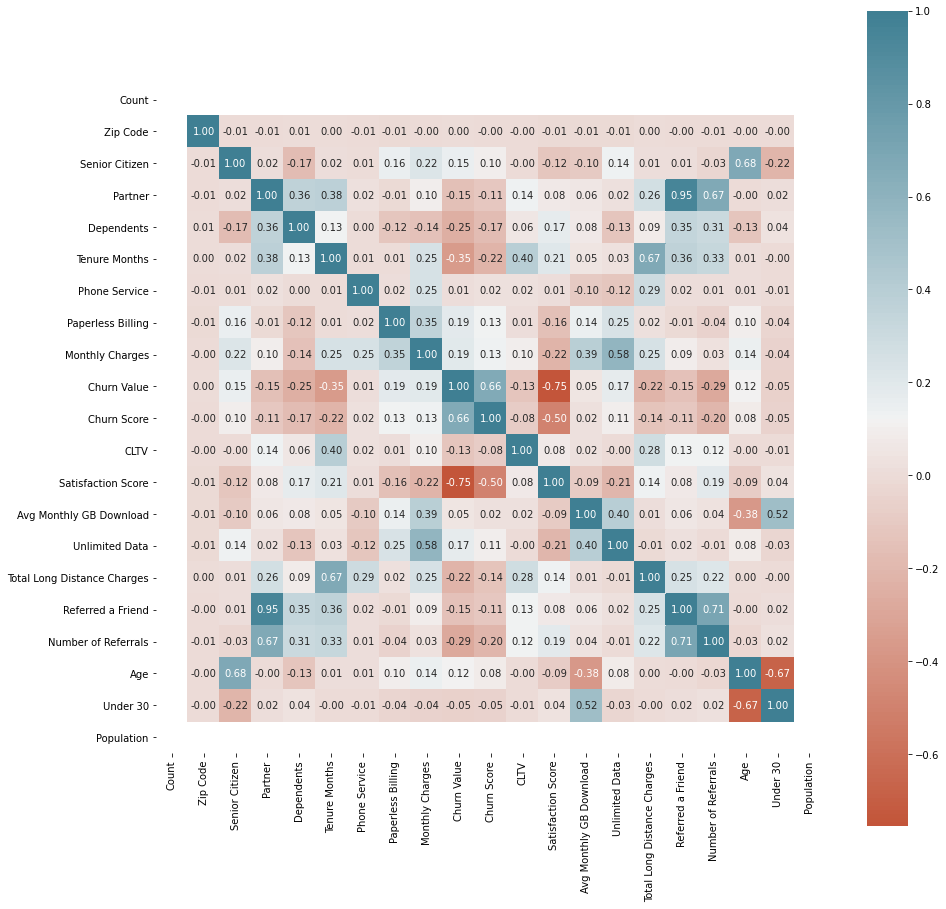

In [9]:
plt.subplots(figsize=(15,15))
sns.heatmap(churn.corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            annot=True,
            fmt='.2f'
           );


Based on the initial heatmap, the quantitative variables of interest for a model to predict churn look to be:
- Satisfaction Score: Strong negative correlation --> Customers that are not satisfified are likely to leave.
- Tenure Months: Moderate negative correlation --> The longer a customer remains with the company, the lesser likelihood to leave.
- Number of Referrals: Slight negative correlation --> Customers who refer more new customers are less likely to leave.
- Dependents: Slight negative correlation --> Larger families are less likely to leave

All the intial assessment above also are in line with the industry norms and understanding of customer bases.  The next stage will be to determine exactly how much each factor weighs into the decision to leave.

Also I will be investigating the categorical variables via other tools, to understand if specific values correlate more or less with churn.

In [10]:
Remaining_Cols = ['CustomerID', 'City', 'Zip Code',
                  'Gender', 'Senior Citizen',  'Partner',
                  'Phone Service', 'Multiple Lines', 'Internet Service',  'Unlimited Data',
                  'Online Security',  'Online Backup', 'Device Protection', 'Tech Support', 
                  'Streaming TV', 'Streaming Movies', 
                  'Contract', 'Paperless Billing', 'Payment Method',
                  'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',   'Churn Category',
                    ]
churn_cat= churn[Remaining_Cols ]

In [11]:
churn_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   City               7043 non-null   object
 2   Zip Code           7043 non-null   int64 
 3   Gender             7043 non-null   object
 4   Senior Citizen     7043 non-null   int64 
 5   Partner            7043 non-null   int64 
 6   Phone Service      7043 non-null   int64 
 7   Multiple Lines     7043 non-null   object
 8   Internet Service   7043 non-null   object
 9   Unlimited Data     7043 non-null   int64 
 10  Online Security    7043 non-null   object
 11  Online Backup      7043 non-null   object
 12  Device Protection  7043 non-null   object
 13  Tech Support       7043 non-null   object
 14  Streaming TV       7043 non-null   object
 15  Streaming Movies   7043 non-null   object
 16  Contract           7043 non-null   object


In [12]:
for col in Remaining_Cols[3:21]:
    print(churn[col].value_counts(), '\n')

Male      3555
Female    3488
Name: Gender, dtype: int64 

0    5901
1    1142
Name: Senior Citizen, dtype: int64 

0    3641
1    3402
Name: Partner, dtype: int64 

1    6361
0     682
Name: Phone Service, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64 

1    4745
0    2298
Name: Unlimited Data, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64 

No                     28

In [13]:
Binary_Vars=['Senior Citizen',  'Partner', 'Phone Service',  'Unlimited Data', 'Paperless Billing']
YesNoNa_Vars=['Multiple Lines', 'Online Security',  'Online Backup', 'Device Protection', 
              'Tech Support', 'Streaming TV', 'Streaming Movies']
Cat_Vars=[ 'Gender', 'Internet Service', 'Contract', 'Payment Method']
Target_Var='Churn Value'

    
Other_Vars= ['CustomerID', 'City', 'Zip Code', 'Churn Label','CLTV', 'Churn Reason', 'Churn Category']

In [14]:
for var in Other_Vars[1:]:
    print(churn[var].value_counts(), '\n')

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Fort Irwin         4
Fairfield          4
Nevada City        4
Tulare             4
Arcata             4
Name: City, Length: 1129, dtype: int64 

92139    5
91306    5
90602    5
90502    5
90402    5
        ..
92335    4
95385    4
92339    4
92347    4
95531    4
Name: Zip Code, Length: 1652, dtype: int64 

No     5174
Yes    1869
Name: Churn Label, dtype: int64 

5546    8
4741    7
5137    7
2269    7
4115    7
       ..
6405    1
6409    1
2315    1
2327    1
2049    1
Name: CLTV, Length: 3438, dtype: int64 

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network re

In [15]:
Churn_Vars=['Churn Reason','Churn Reason']

del Other_Vars[-2:]
Other_Vars

['CustomerID', 'City', 'Zip Code', 'Churn Label', 'CLTV']

In [17]:
for var in YesNoNa_Vars:
    print(churn[var].unique())

['No' 'Yes' 'No phone service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


## Initial analysis of Binary Variables

In [19]:
Bin_Vals = {}
for var in Binary_Vars:
    unique_vals = list(churn[var].unique())
    Bin_Vals[var] = unique_vals

print(Bin_Vals)

{'Senior Citizen': [0, 1], 'Partner': [0, 1], 'Phone Service': [1, 0], 'Unlimited Data': [1, 0], 'Paperless Billing': [1, 0]}


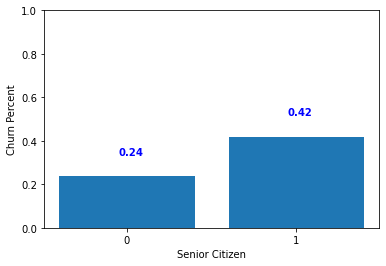

In [32]:
var=list(Bin_Vals.keys())[0]

Bin_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Bin_Churn[var]
y_vals=Bin_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

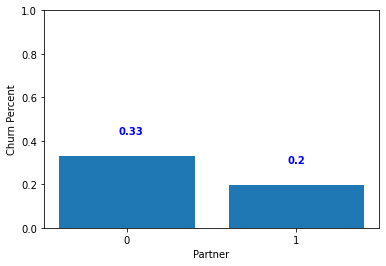

In [33]:
var=list(Bin_Vals.keys())[1]

Bin_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Bin_Churn[var]
y_vals=Bin_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

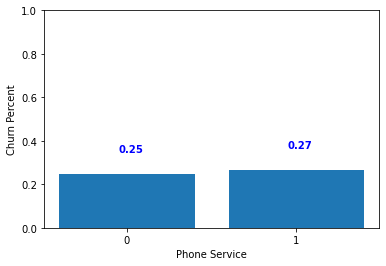

In [34]:
var=list(Bin_Vals.keys())[2]

Bin_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Bin_Churn[var]
y_vals=Bin_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);


for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

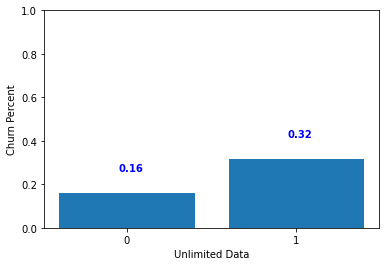

In [35]:
var=list(Bin_Vals.keys())[3]

Bin_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Bin_Churn[var]
y_vals=Bin_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);


for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

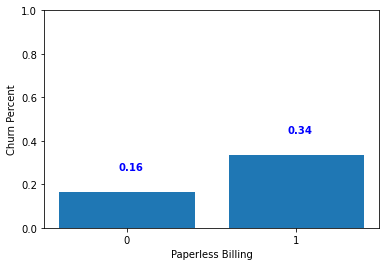

In [36]:
var=list(Bin_Vals.keys())[4]

Bin_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Bin_Churn[var]
y_vals=Bin_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);


for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

Based on the above, there is correlation to further investigate between higher churn and Senior Citizens, single customers, customers with unlimited data, and customers with paperless billing.

It if very plausible that some of these are correlated to on another, so I will need to check that first.


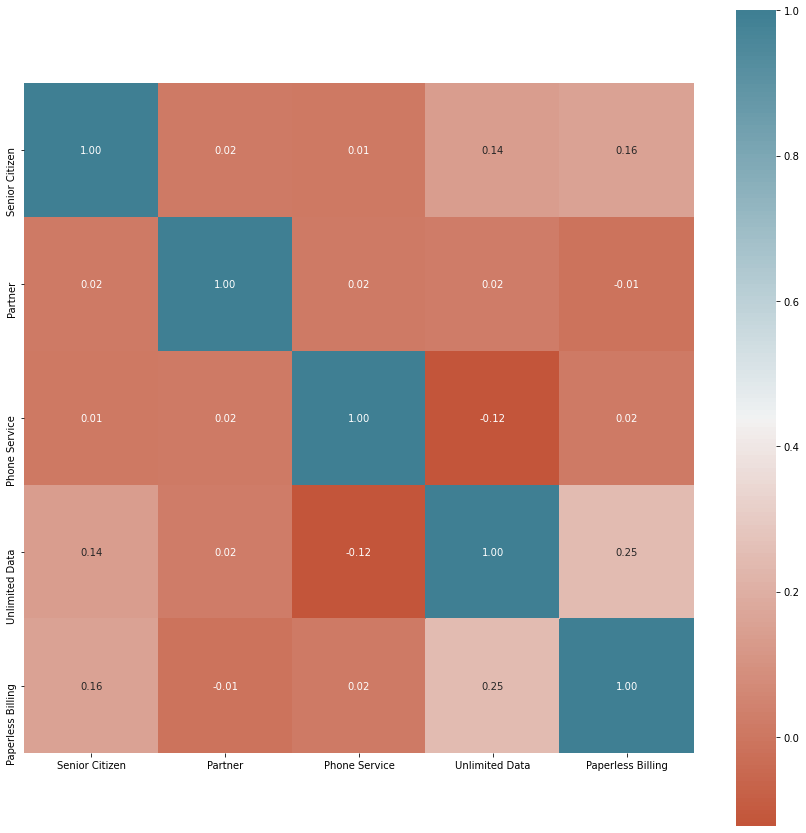

In [38]:
plt.subplots(figsize=(15,15))
sns.heatmap(churn[Binary_Vars].corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            annot=True,
            fmt='.2f'
           );


There is some level of rcorreclation between Unlimited Data and Paperless Billing--which would make sense.  When creating models, I will need to compare models with and withouth one or both of these.

## Initial analysis of Yes/No Variables

In [39]:
YesNoNa_Vals = {}
for var in YesNoNa_Vars:
    unique_vals = list(churn[var].unique())
    YesNoNa_Vals[var] = unique_vals

print(YesNoNa_Vals)

{'Multiple Lines': ['No', 'Yes', 'No phone service'], 'Online Security': ['Yes', 'No', 'No internet service'], 'Online Backup': ['Yes', 'No', 'No internet service'], 'Device Protection': ['No', 'Yes', 'No internet service'], 'Tech Support': ['No', 'Yes', 'No internet service'], 'Streaming TV': ['No', 'Yes', 'No internet service'], 'Streaming Movies': ['No', 'Yes', 'No internet service']}


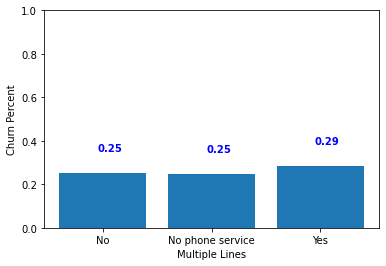

In [41]:
var=list(YesNoNa_Vals.keys())[0]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

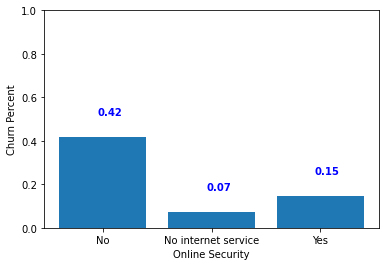

In [42]:
var=list(YesNoNa_Vals.keys())[1]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

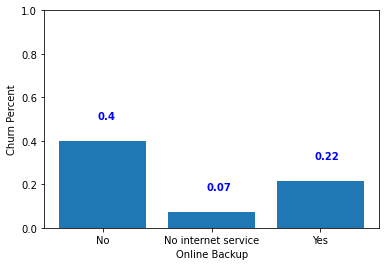

In [43]:
var=list(YesNoNa_Vals.keys())[2]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

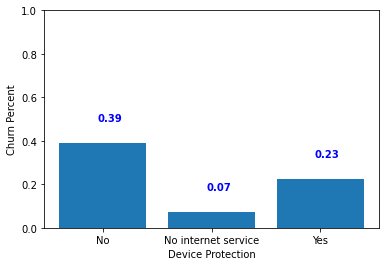

In [44]:
var=list(YesNoNa_Vals.keys())[3]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

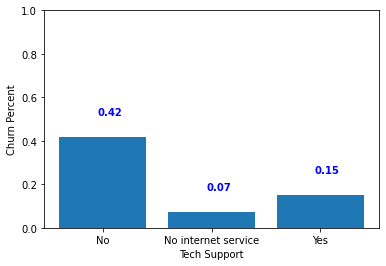

In [45]:
var=list(YesNoNa_Vals.keys())[4]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

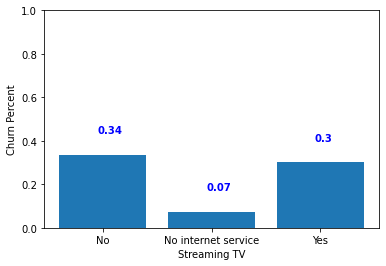

In [46]:
var=list(YesNoNa_Vals.keys())[5]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

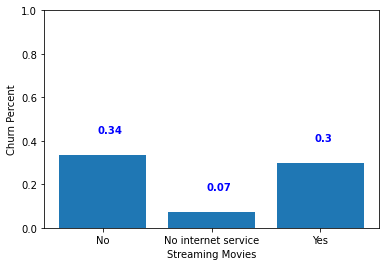

In [47]:
var=list(YesNoNa_Vals.keys())[6]

YesNoNa_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=YesNoNa_Churn[var]
y_vals=YesNoNa_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(x_vars,rotation=0);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

Based on the above, customers with security, device protection, tech support, and online backup tend to churn less.

Once again there begs the question of correlation between the variables.


ValueError: zero-size array to reduction operation fmin which has no identity

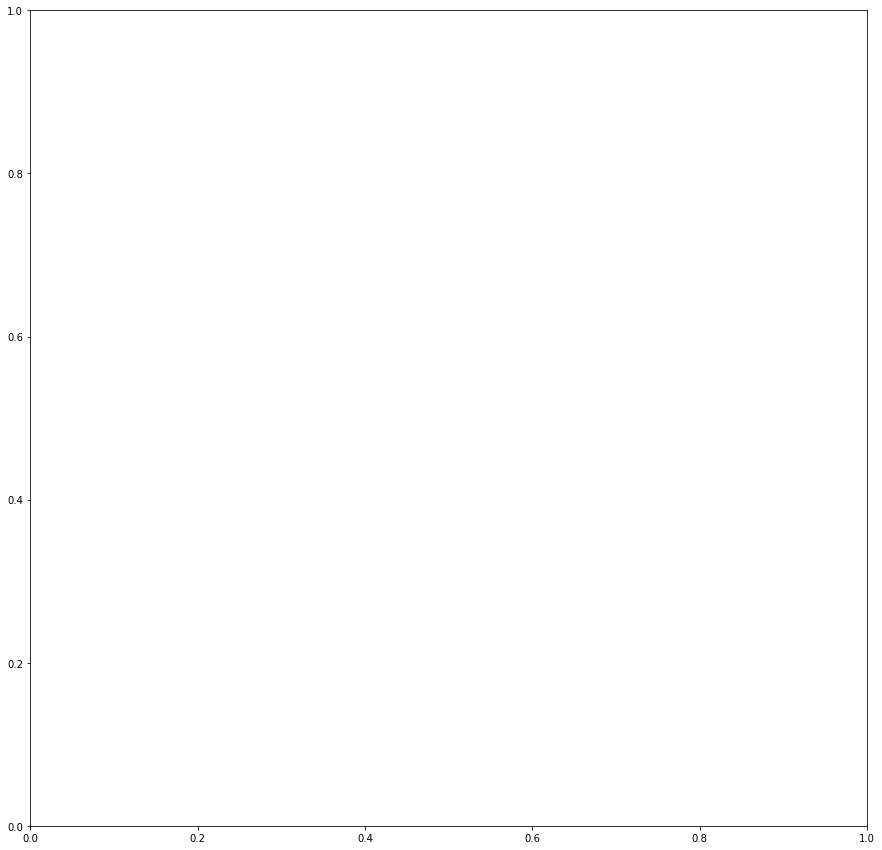

In [50]:
plt.subplots(figsize=(15,15))
sns.heatmap(churn[YesNoNa_Vars].corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            annot=True,
            fmt='.2f'
           );


There is some level of rcorreclation between Unlimited Data and Paperless Billing--which would make sense.  When creating models, I will need to compare models with and withouth one or both of these.

In [176]:
pd.pivot_table(churn, 
               values='Churn Value',
               index=Binary_Vals,
               columns=np.sBinary_Vars
              )

KeyError: 0

In [161]:
YesNoNa_Vals = []
for var in YesNoNa_Vars:
    unique_vals = churn[var].unique()
    for k in range(len(unique_vals)):
            current_val = unique_vals[k]
            if current_val not in YesNoNa_Vals:
                YesNoNa_Vals.append(current_val)
           
            
YesNoNa_Vals

['No', 'Yes', 'No phone service', 'No internet service']

In [167]:
Cat_Vals = {}
for var in Cat_Vars:
    unique_vals = list(churn[var].unique())
    Cat_Vals[var] = unique_vals

print(Cat_Vals)

{'Gender': ['Male', 'Female'], 'Internet Service': ['DSL', 'Fiber optic', 'No'], 'Contract': ['Month-to-month', 'Two year', 'One year'], 'Payment Method': ['Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)']}


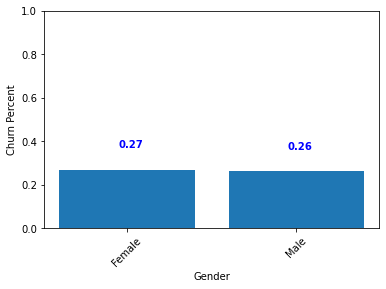

In [252]:
var=list(Cat_Vals.keys())[0]

Var_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Var_Churn[var]
y_vals=Var_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(rotation=45);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

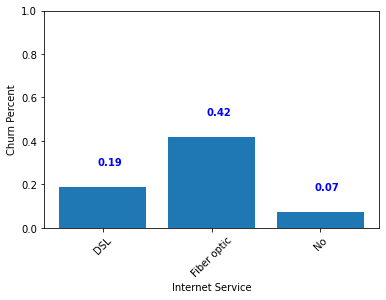

In [251]:
var=list(Cat_Vals.keys())[1]

Var_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Var_Churn[var]
y_vals=Var_Churn['Churn Value']

#.reset_index().pivot(columns='Gender')
_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(rotation=45)

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

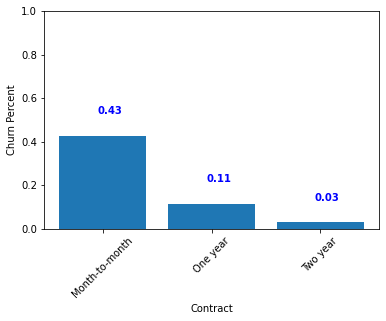

In [264]:
var=list(Cat_Vals.keys())[2]

Var_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Var_Churn[var]
y_vals=Var_Churn['Churn Value']

_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(rotation=45);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

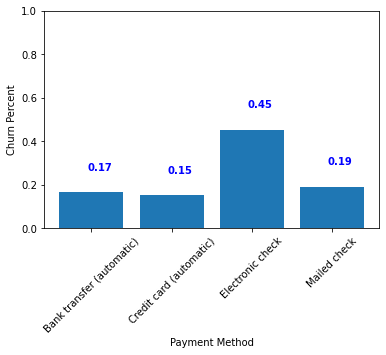

In [265]:
var=list(Cat_Vals.keys())[3]

Var_Churn = pd.pivot_table(churn, columns=var, values='Churn Value').transpose().reset_index()

x_vars=Var_Churn[var]
y_vals=Var_Churn['Churn Value']

_ = plt.bar(x=x_vars,height=y_vals );
plt.xlabel(var)
plt.ylabel('Churn Percent');
plt.ylim([0,1]);
plt.xticks(rotation=45);

for i, v in enumerate(y_vals):
    plt.text(i-0.05, v+.1, str(round(v,2)), 
            color = 'blue', fontweight = 'bold');

Based on the above Churn looks to be different based on the internet serivce, contract, or payment method.

In [209]:
k=0
plt.xlabel(Cat_Vars[k])
x=Cat_Vals[Cat_Vars[k]]d
y=churn.
plt.bar(x=, height=Cat_Vals[Cat_Vars[0]].mean())


SyntaxError: invalid syntax (<ipython-input-209-794e8468077d>, line 4)

In [ ]:
Cat_Vars_Vals = []
for var in Cat_Vars:
    for k in range(churn[var].nunique()):
        current_val = churn[var].unique()[k]
        if current_val not in YesNoNa_Vars:
            YesNoNa_Vars.append(current_val)

            
YesNoNa_Vars     

In [101]:
ge(len(var)):
        print(k, churn[var[k]])
        
        if churn[var[k]] in Binary_Vals:
           Binary_Vals = Binary_Vals 
        else:
            Binary_Vals.append(churn[var[k]])
    
print(Binary_Vals)

KeyError: 'S'

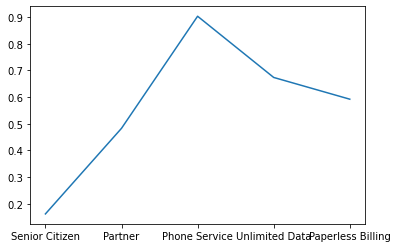

In [87]:
churn.pivot(Targer_Var).mean()

plt.bar(churn[Binary_Vars].mean());

# Graveyard 

In [18]:
Binary_Vals = []
for var in Binary_Vars:
    for k in range(churn[var].nunique()):
        current_val = churn[var].unique()[k]
        if current_val not in Binary_Vals:
            Binary_Vals.append(current_val)

            
Binary_Vals     

[0, 1]

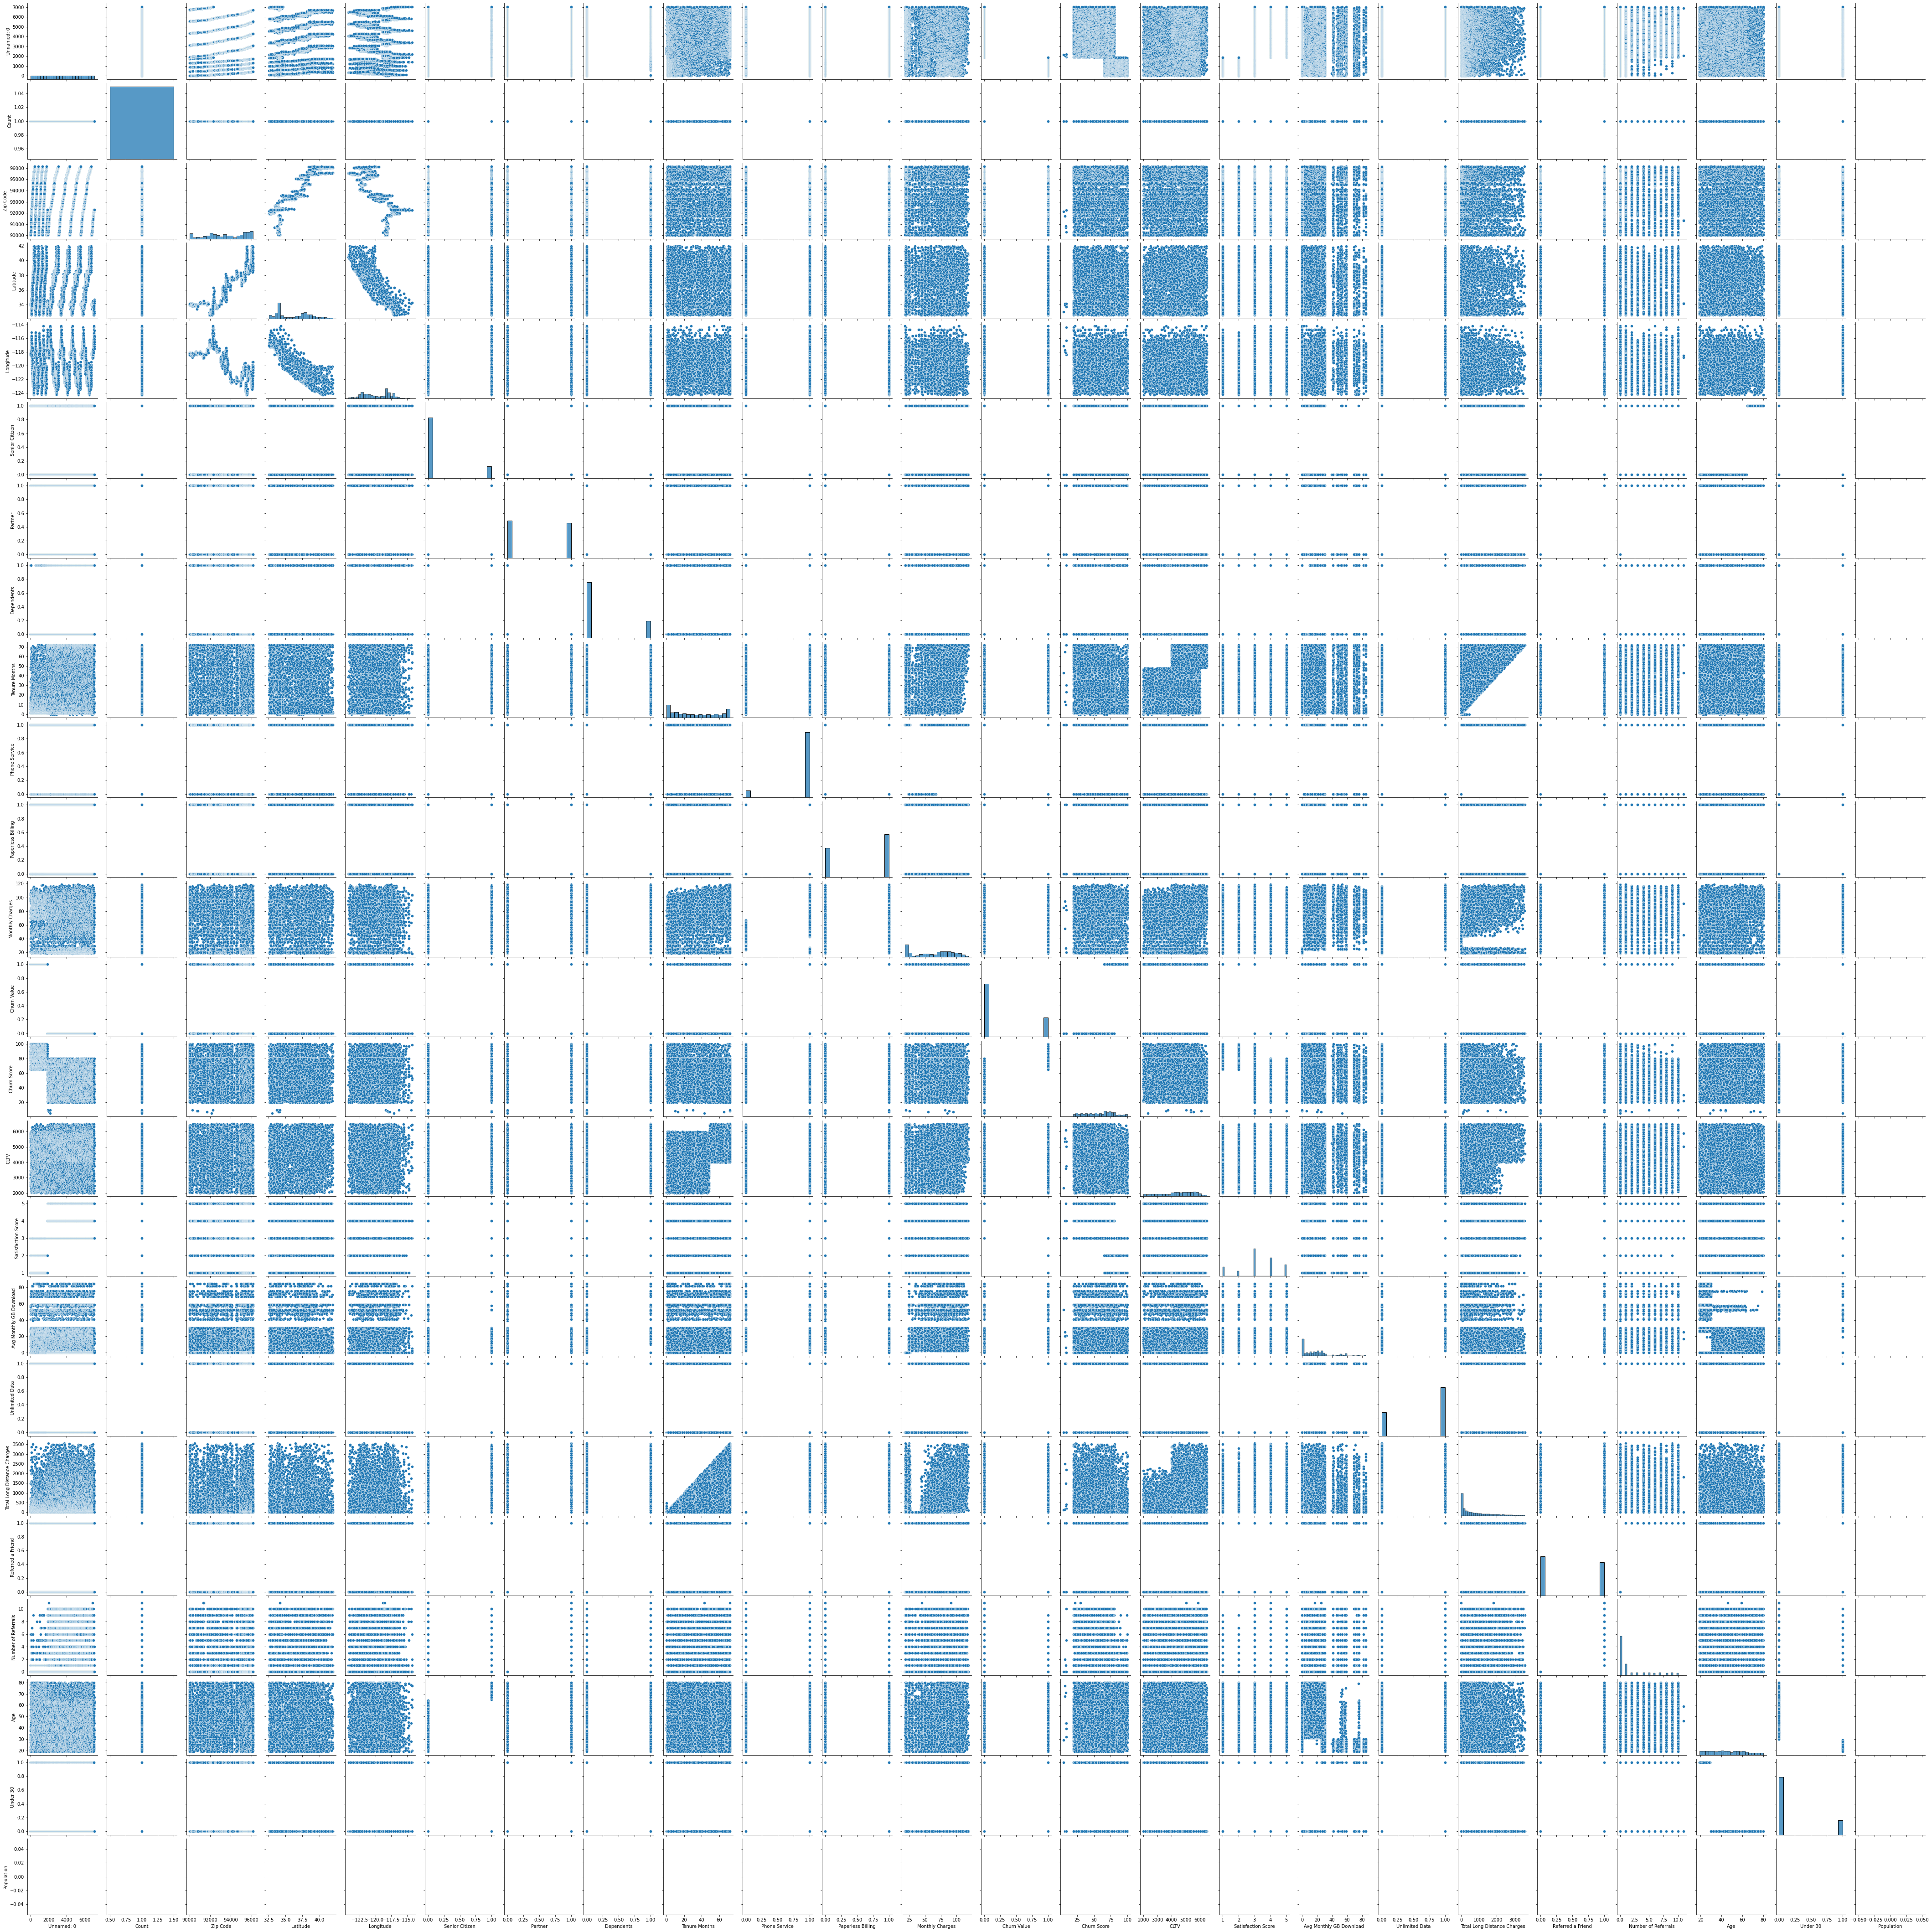

In [8]:
sns.pairplot(churn)

In [16]:
churn_pt1 = churn[[ 'Gender', 'Senior Citizen', 'Age', 'Under 30', 'Partner', 'Dependents',
                   'Churn Value', 'Churn Score']]

In [17]:
churn_pt1

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Churn Value  \
0       Male               0        0           0              2            1   
1     Female               0        0           1              2            1   
2     Female               0        0           1              8            1   
3     Female               0        1           1             28            1   
4       Male               0        0           1             49            1   
...      ...             ...      ...         ...            ...          ...   
7038  Female               0        0           0             72            0   
7039    Male               0        1           1             24            0   
7040  Female               0        1           1             72            0   
7041  Female               0        1           1             11            0   
7042    Male               0        0           0             66            0   

      Churn Score  
0              86  
1              67  
2              86  
3              84  
4              89  
...           ...  
7038           45  
7039           59  
7040           71  
7041           59  
7042           38  

[7043 rows x 7 columns]

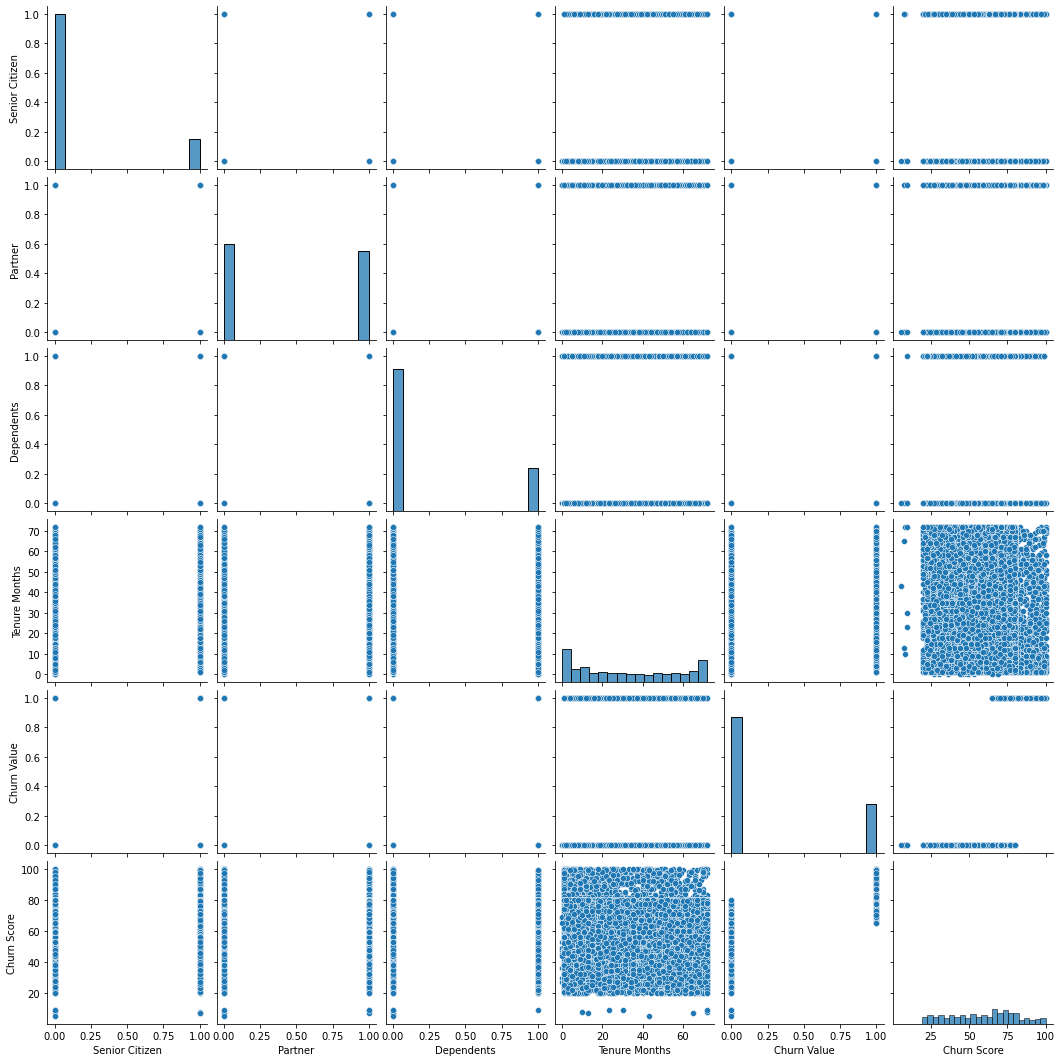

In [20]:
sns.pairplot(churn_pt1)

In [21]:
churn_pt2 = churn[[  'Phone Service',   'Multiple Lines', 'Internet Service', 
                   'Online Security',  'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies','Unlimited Data', 
                   'Churn Value', 'Churn Score']]                   

In [22]:
churn_pt2

Phone Service    Multiple Lines Internet Service      Online Security  \
0                 1                No              DSL                  Yes   
1                 1                No      Fiber optic                   No   
2                 1               Yes      Fiber optic                   No   
3                 1               Yes      Fiber optic                   No   
4                 1               Yes      Fiber optic                   No   
...             ...               ...              ...                  ...   
7038              1                No               No  No internet service   
7039              1               Yes              DSL                  Yes   
7040              1               Yes      Fiber optic                   No   
7041              0  No phone service              DSL                  Yes   
7042              1                No      Fiber optic                  Yes   

            Online Backup    Device Protection         Tech Support  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

             Streaming TV     Streaming Movies  Unlimited Data  Churn Value  \
0                      No                   No               1            1   
1                      No                   No               1            1   
2                     Yes                  Yes               1            1   
3                     Yes                  Yes               1            1   
4                     Yes                  Yes               1            1   
...                   ...                  ...             ...          ...   
7038  No internet service  No internet service               0            0   
7039                  Yes                  Yes               1            0   
7040                  Yes                  Yes               1            0   
7041                   No                   No               1            0   
7042                  Yes                  Yes               1            0   

      Churn Score  
0              86  
1              67  
2              86  
3              84  
4              89  
...           ...  
7038           45  
7039           59  
7040           71  
7041           59  
7042           38  

[7043 rows x 12 columns]

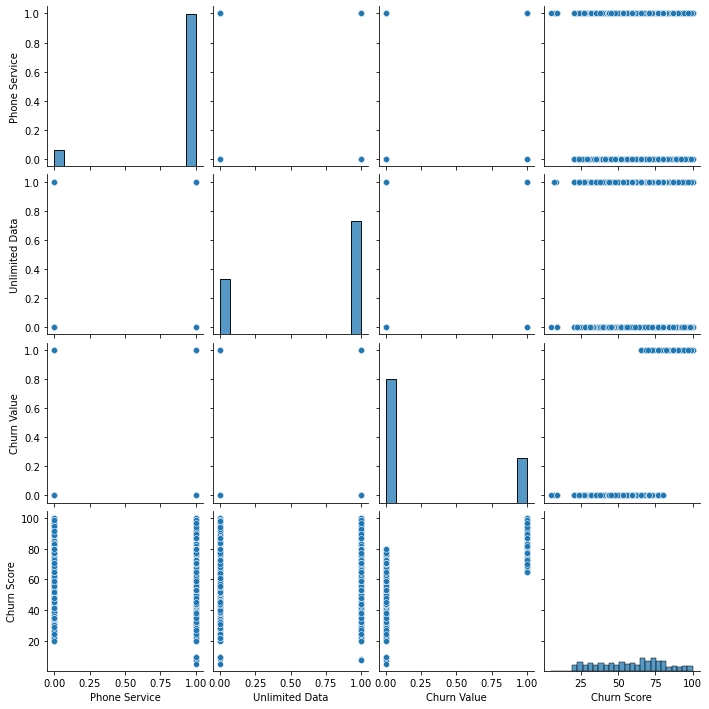

In [23]:
sns.pairplot(churn_pt2)

In [24]:
churn_pt3 = churn[['Paperless Billing', 'Payment Method','Avg Monthly GB Download',
                   'Monthly Charges', 'Total Charges', 'Total Long Distance Charges',
                   'Churn Value', 'Churn Score']]                   

In [25]:
churn_pt3

Paperless Billing             Payment Method  Avg Monthly GB Download  \
0                     1               Mailed check                       21   
1                     1           Electronic check                       51   
2                     1           Electronic check                       26   
3                     1           Electronic check                       47   
4                     1  Bank transfer (automatic)                       11   
...                 ...                        ...                      ...   
7038                  1  Bank transfer (automatic)                        0   
7039                  1               Mailed check                       24   
7040                  1    Credit card (automatic)                       59   
7041                  1           Electronic check                       17   
7042                  1  Bank transfer (automatic)                       11   

      Monthly Charges Total Charges  Total Long Distance Charges  Churn Value  \
0               53.85        108.15                        20.94            1   
1               70.70        151.65                        18.24            1   
2               99.65         820.5                        97.20            1   
3              104.80       3046.05                       136.92            1   
4              103.70        5036.3                      2172.17            1   
...               ...           ...                          ...          ...   
7038            21.15        1419.4                      1639.44            0   
7039            84.80        1990.5                       865.20            0   
7040           103.20        7362.9                      2135.52            0   
7041            29.60        346.45                         0.00            0   
7042           105.65        6844.5                      2043.36            0   

      Churn Score  
0              86  
1              67  
2              86  
3              84  
4              89  
...           ...  
7038           45  
7039           59  
7040           71  
7041           59  
7042           38  

[7043 rows x 8 columns]

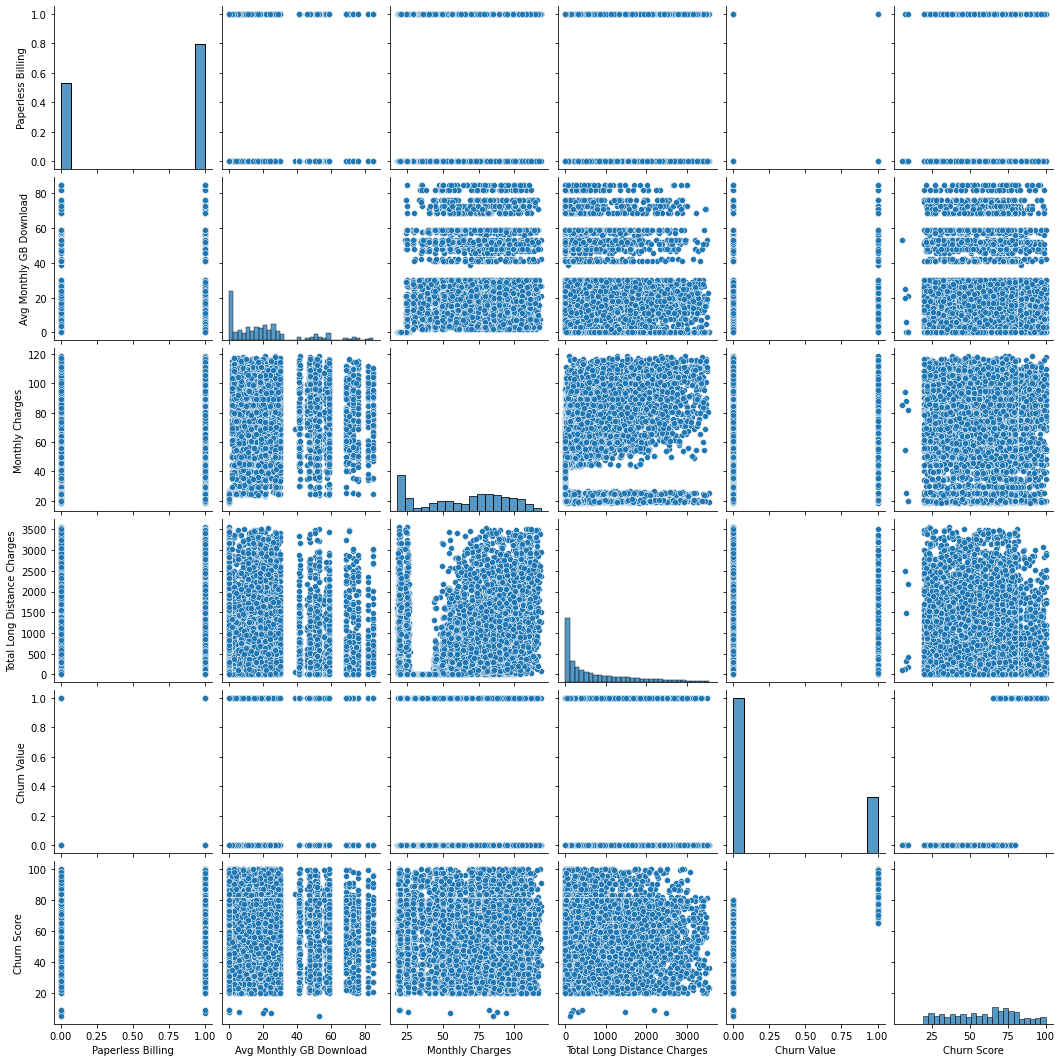

In [26]:
sns.pairplot(churn_pt3)

In [28]:
churn_pt4 = churn[[ 'Satisfaction Score','Referred a Friend', 'Number of Referrals',
                   'Tenure Months', 
                   'Churn Value', 'Churn Score']]   

In [29]:
churn_pt4

Satisfaction Score  Referred a Friend  Number of Referrals  \
0                      1                  0                    0   
1                      2                  0                    0   
2                      3                  0                    0   
3                      3                  0                    0   
4                      1                  0                    0   
...                  ...                ...                  ...   
7038                   5                  0                    0   
7039                   3                  1                    1   
7040                   4                  1                    4   
7041                   4                  1                    1   
7042                   4                  0                    0   

      Tenure Months  Churn Value  Churn Score  
0                 2            1           86  
1                 2            1           67  
2                 8            1           86  
3                28            1           84  
4                49            1           89  
...             ...          ...          ...  
7038             72            0           45  
7039             24            0           59  
7040             72            0           71  
7041             11            0           59  
7042             66            0           38  

[7043 rows x 6 columns]

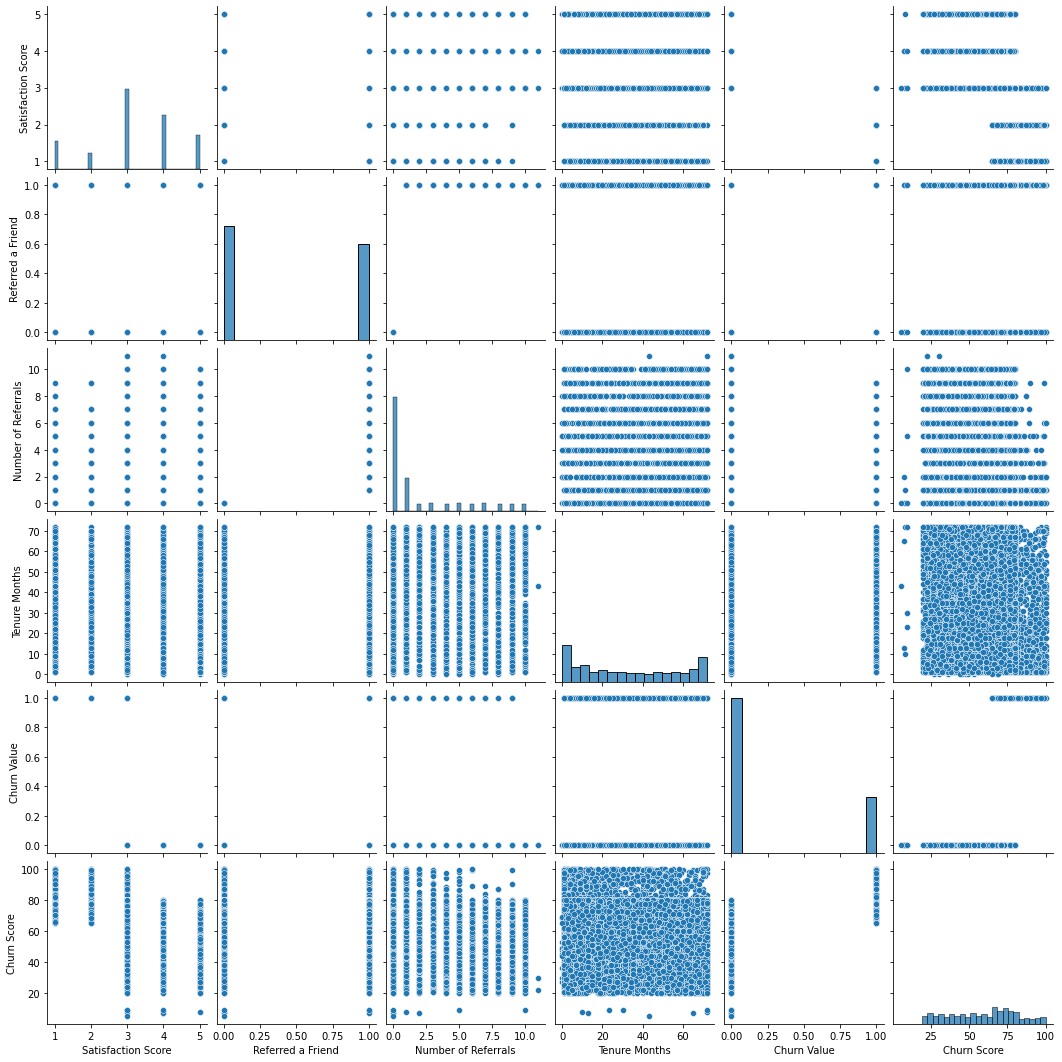

In [44]:
sns.pairplot(churn_pt4);